In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# For model development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [4]:
#Loading dataset
df = pd.read_csv('C:/Users/lyasm/OneDrive/Desktop/VowelA_High_latest.csv')

## Inspecting the Dataset

In [5]:
df.head()

,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,ID,G,A
0,0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,...,-28.190628,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20
1,1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,...,7.790230,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22
2,2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,...,-20.040691,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66
3,3,1000-a_h.wav,0.198861,0.157396,1119.517351,1529.490600,1501.657586,0.045487,-210.244278,139.819519,...,-0.163550,7.797343,-26.314997,-6.622046,0.535120,0.749695,Healthy,1000,m,31
4,4,1002-a_h.wav,0.370113,0.143538,1060.678054,1346.299507,1524.942294,0.050109,-175.039948,181.905212,...,-20.939833,13.306650,-26.597456,-8.324528,10.786009,-6.677513,Healthy,1002,m,25


In [6]:
df.shape

(2035, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2035 non-null   int64  
 1   filename            2035 non-null   object 
 2   chroma_stft         2035 non-null   float64
 3   rmse                2035 non-null   float64
 4   spectral_centroid   2035 non-null   float64
 5   spectral_bandwidth  2035 non-null   float64
 6   rolloff             2035 non-null   float64
 7   zero_crossing_rate  2035 non-null   float64
 8   mfcc1               2035 non-null   float64
 9   mfcc2               2035 non-null   float64
 10  mfcc3               2035 non-null   float64
 11  mfcc4               2035 non-null   float64
 12  mfcc5               2035 non-null   float64
 13  mfcc6               2035 non-null   float64
 14  mfcc7               2035 non-null   float64
 15  mfcc8               2035 non-null   float64
 16  mfcc9 

In [8]:
df.columns

Index(['Unnamed: 0', 'filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label', 'ID', 'G', 'A'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,ID,A
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,...,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,1017.000000,0.226609,0.192420,1316.674901,1684.033835,2092.416751,0.054684,-204.067168,126.722018,-22.393496,...,-8.734429,-5.350486,-9.339216,-4.453604,-10.470535,-0.210970,-3.223628,-0.086769,1510.224079,42.735135
std,587.598219,0.065532,0.064474,401.289370,434.532199,1243.021777,0.020236,46.305767,30.334038,26.034214,...,12.347000,10.617456,10.776392,9.846105,10.680155,11.276234,11.861935,13.605515,691.993150,18.136219
min,0.000000,0.120402,0.015067,566.319248,830.011306,698.962823,0.012267,-364.190887,34.765537,-98.049812,...,-43.903988,-41.178494,-42.943760,-33.339111,-47.470993,-39.699654,-37.845348,-26.634350,1.000000,9.000000
25%,508.500000,0.182932,0.147187,1056.073776,1376.519591,1311.850933,0.043071,-233.579994,105.017399,-40.443611,...,-17.092666,-12.538943,-16.603648,-11.197297,-17.044333,-7.253432,-10.621632,-8.397901,1029.500000,24.000000
50%,1017.000000,0.213884,0.186241,1233.786591,1592.463814,1627.910156,0.053438,-206.244324,125.547623,-22.962688,...,-9.217700,-5.644279,-9.219134,-4.847927,-10.672474,-0.787079,-4.538218,-2.492458,1562.000000,42.000000
75%,1525.500000,0.251294,0.231145,1468.926577,1905.480356,2419.182517,0.063741,-176.142578,147.534126,-4.733893,...,-0.458571,1.464114,-2.087247,1.613136,-4.567178,5.772127,2.184904,4.519961,2087.500000,59.000000
max,2034.000000,0.614178,0.463574,4295.111712,3403.279259,8581.931440,0.271903,5.806334,231.070160,62.088444,...,37.463779,39.626431,36.621784,50.495834,43.146259,57.036415,53.712471,60.703381,2611.000000,94.000000


In [10]:
#Dropping the Unnamed column from the dataset
df.drop(df.columns[0], axis=1, inplace=True)

In [11]:
#Confirming column dropped
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,ID,G,A
0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,-34.518085,...,-28.190628,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20
1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,0.882231,...,7.790230,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22
2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,-37.398190,...,-20.040691,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66
3,1000-a_h.wav,0.198861,0.157396,1119.517351,1529.490600,1501.657586,0.045487,-210.244278,139.819519,-7.774013,...,-0.163550,7.797343,-26.314997,-6.622046,0.535120,0.749695,Healthy,1000,m,31
4,1002-a_h.wav,0.370113,0.143538,1060.678054,1346.299507,1524.942294,0.050109,-175.039948,181.905212,-33.181606,...,-20.939833,13.306650,-26.597456,-8.324528,10.786009,-6.677513,Healthy,1002,m,25


In [12]:
#Renaming the 'G' and 'A'
df.rename(columns={
    'ID': 'patient_ID',
    'G':'gender',
    'A': 'age',
   }, inplace=True)

In [13]:
#Confriming column rename
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,patient_ID,gender,age
0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,-34.518085,...,-28.190628,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20
1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,0.882231,...,7.790230,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22
2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,-37.398190,...,-20.040691,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66
3,1000-a_h.wav,0.198861,0.157396,1119.517351,1529.490600,1501.657586,0.045487,-210.244278,139.819519,-7.774013,...,-0.163550,7.797343,-26.314997,-6.622046,0.535120,0.749695,Healthy,1000,m,31
4,1002-a_h.wav,0.370113,0.143538,1060.678054,1346.299507,1524.942294,0.050109,-175.039948,181.905212,-33.181606,...,-20.939833,13.306650,-26.597456,-8.324528,10.786009,-6.677513,Healthy,1002,m,25


In [14]:
df.columns

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label', 'patient_ID', 'gender', 'age'],
      dtype='object')

In [15]:
#Checking target variable distribution
df.label.value_counts()/len(df)*100

label
Unhealthy    66.240786
Healthy      33.759214
Name: count, dtype: float64

In [16]:
#Checking for invalid or inconsistent values in columns
print(df.gender.value_counts())

print(df.label.value_counts())

gender
w    1155
m     880
Name: count, dtype: int64
label
Unhealthy    1348
Healthy       687
Name: count, dtype: int64


## Data Cleaning

In [17]:
#Checking for duplicate patient entries
print(df.patient_ID.nunique()==len(df))

True


In [18]:
#Checking for null values
df.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
patient_ID            0
gender                0
age                   0
dtype: int64

## EDA & Visualization

In [19]:
df_EDA = df.drop(columns=['filename','patient_ID'])

In [20]:
#Simplify MFCC Features for Visualization
df_EDA['mean_mfcc'] = df_EDA[[f'mfcc{i}' for i in range(1, 21)]].mean(axis=1)
df_EDA['std_mfcc'] = df_EDA[[f'mfcc{i}' for i in range(1, 21)]].std(axis=1)

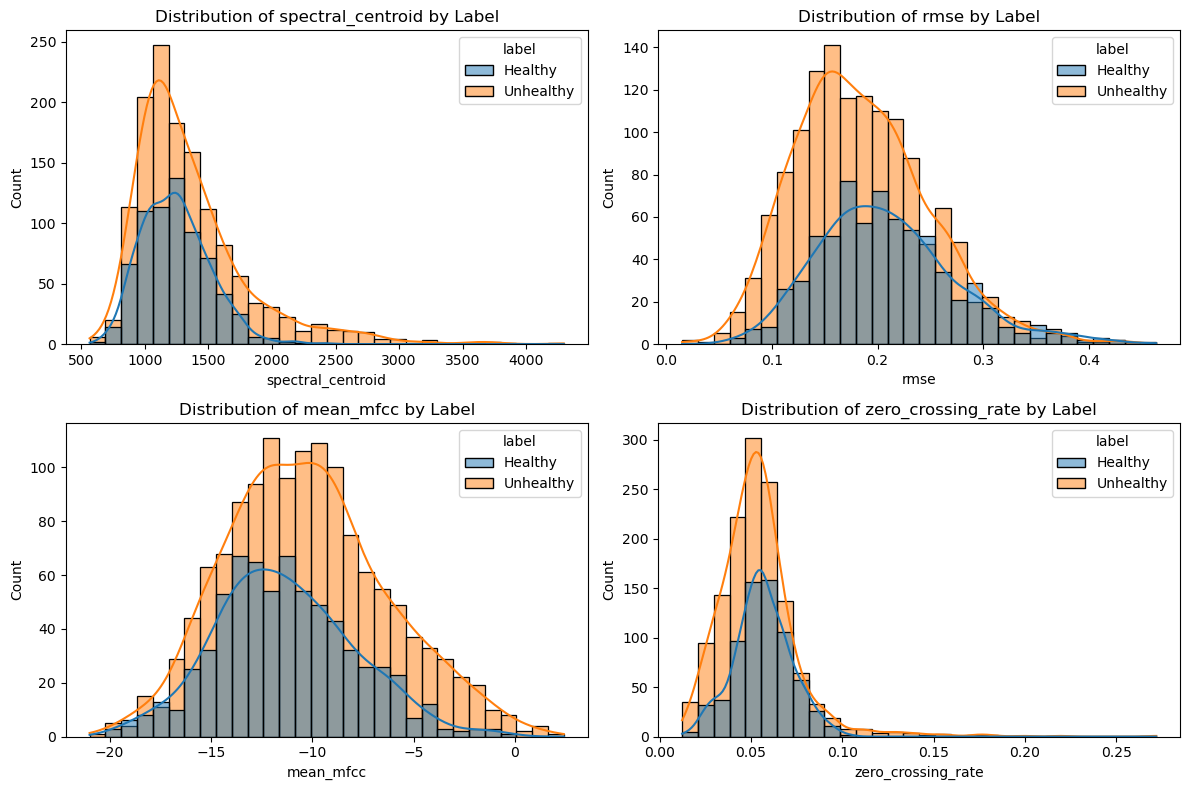

In [21]:
#Histogram of Key Audio Features

# Select key features for visualization
key_features = ['spectral_centroid', 'rmse', 'mean_mfcc', 'zero_crossing_rate']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_EDA, x=feature, hue='label', bins=30, kde=True)
    plt.title(f'Distribution of {feature} by Label')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Health Status by Gender')

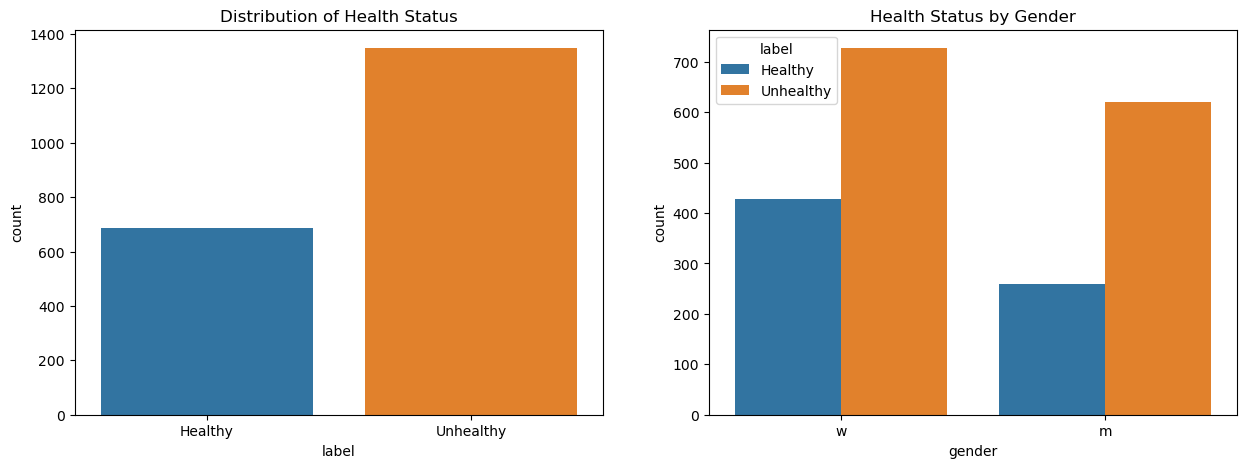

In [22]:
#Bar Charts of Health Distribution

# Chart For Data-wide Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='label', data=df_EDA)
plt.title('Distribution of Health Status')

# Chart for Distribution by Gender
plt.subplot(1, 2, 2)
sns.countplot(x='gender', hue='label', data=df_EDA)
plt.title('Health Status by Gender')

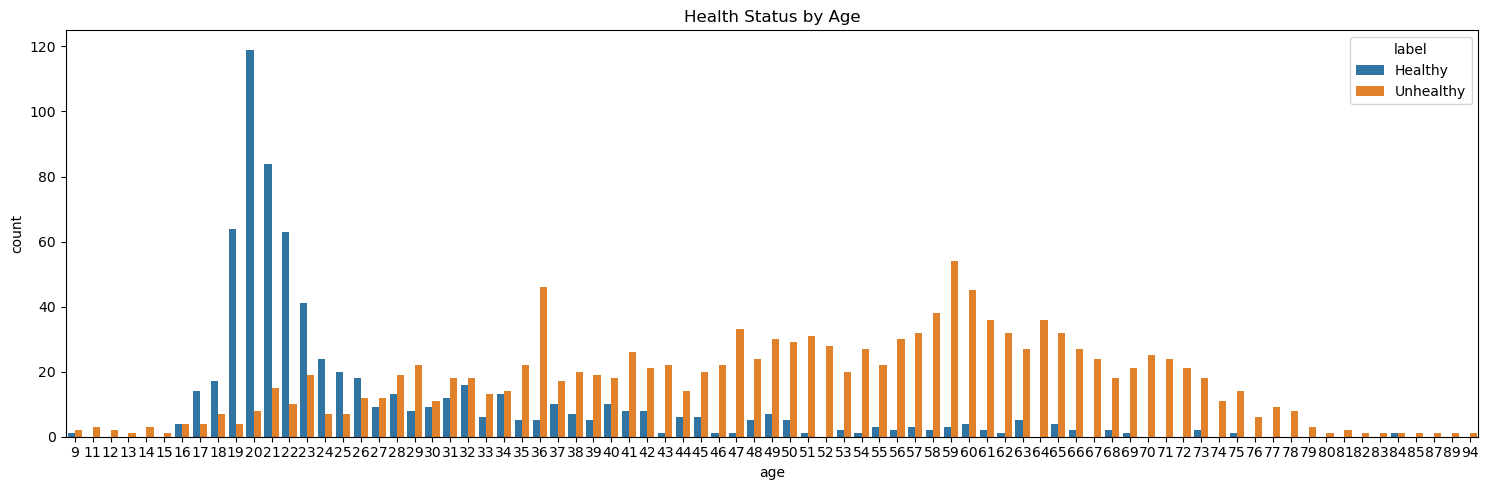

In [23]:
#Bar Charts for Distribution Continued

# Chart for Distribution by Age
plt.figure(figsize=(15, 5))
sns.countplot(x='age', hue='label', data=df_EDA)
plt.title('Health Status by Age')
plt.tight_layout()
plt.show()

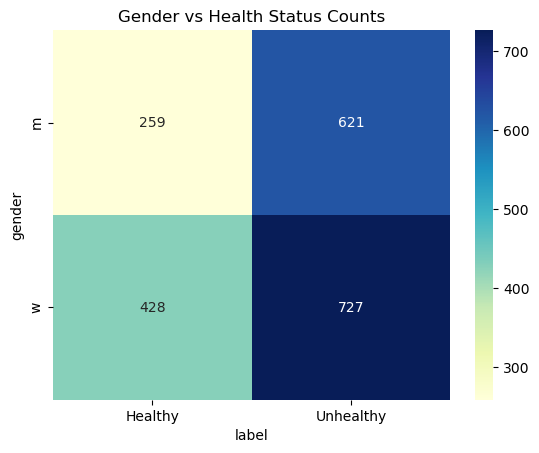

In [24]:
# Plot Heatmap
gender_health = df_EDA.pivot_table(index='gender', columns='label', aggfunc='size', fill_value=0)
sns.heatmap(gender_health, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Gender vs Health Status Counts')
plt.show()

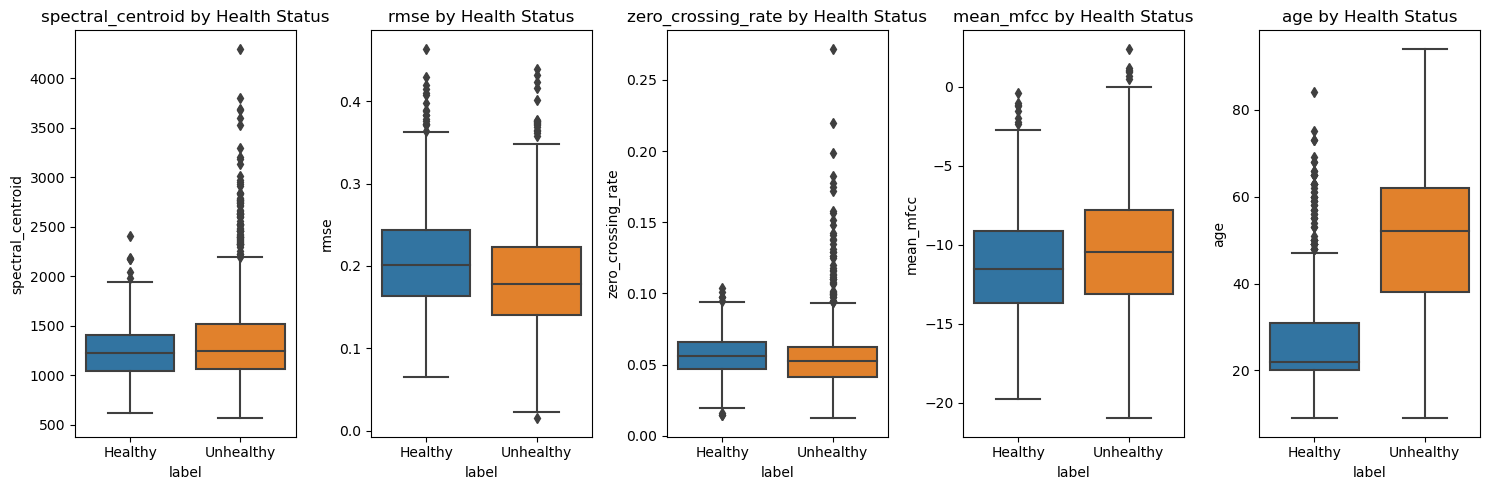

In [25]:
#Box Plots of Key Audio Features

# Box Plots
plt.figure(figsize=(15, 5))
features = ['spectral_centroid', 'rmse', 'zero_crossing_rate', 'mean_mfcc', 'age']
for i, feature in enumerate(features, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x='label', y=feature, data=df_EDA)
    plt.title(f'{feature} by Health Status')
plt.tight_layout()
plt.show()

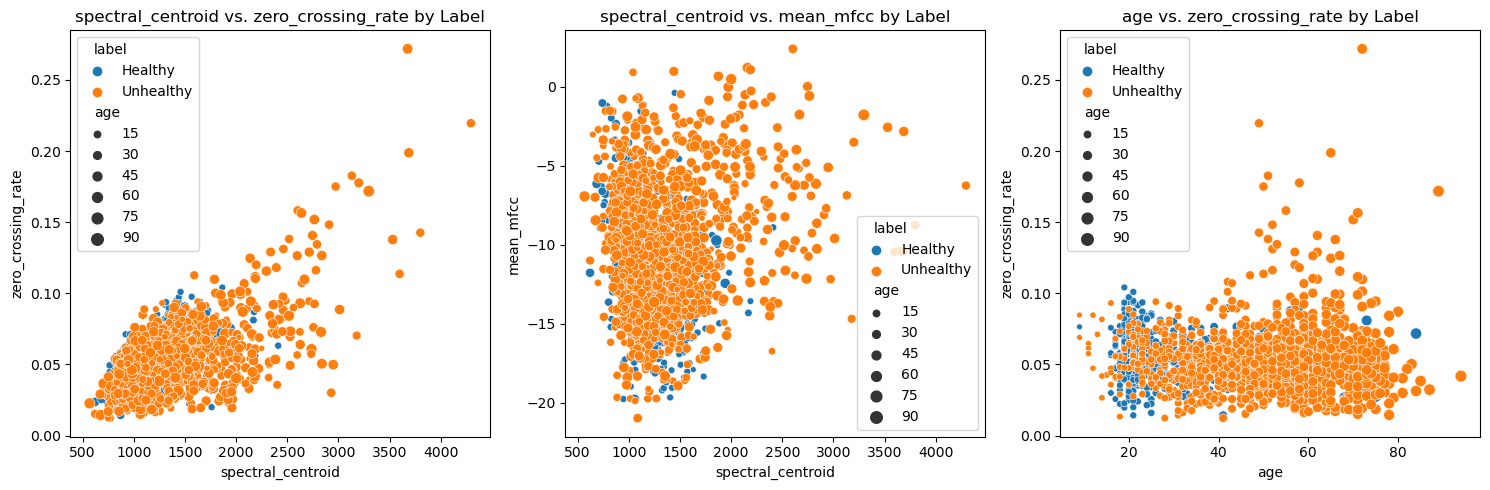

In [26]:
#Scatter Plots
plt.figure(figsize=(15, 5))
pairs = [('spectral_centroid', 'zero_crossing_rate'), ('spectral_centroid', 'mean_mfcc'), ('age', 'zero_crossing_rate')]
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=x, y=y, hue='label', size='age', data=df_EDA)
    plt.title(f'{x} vs. {y} by Label')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


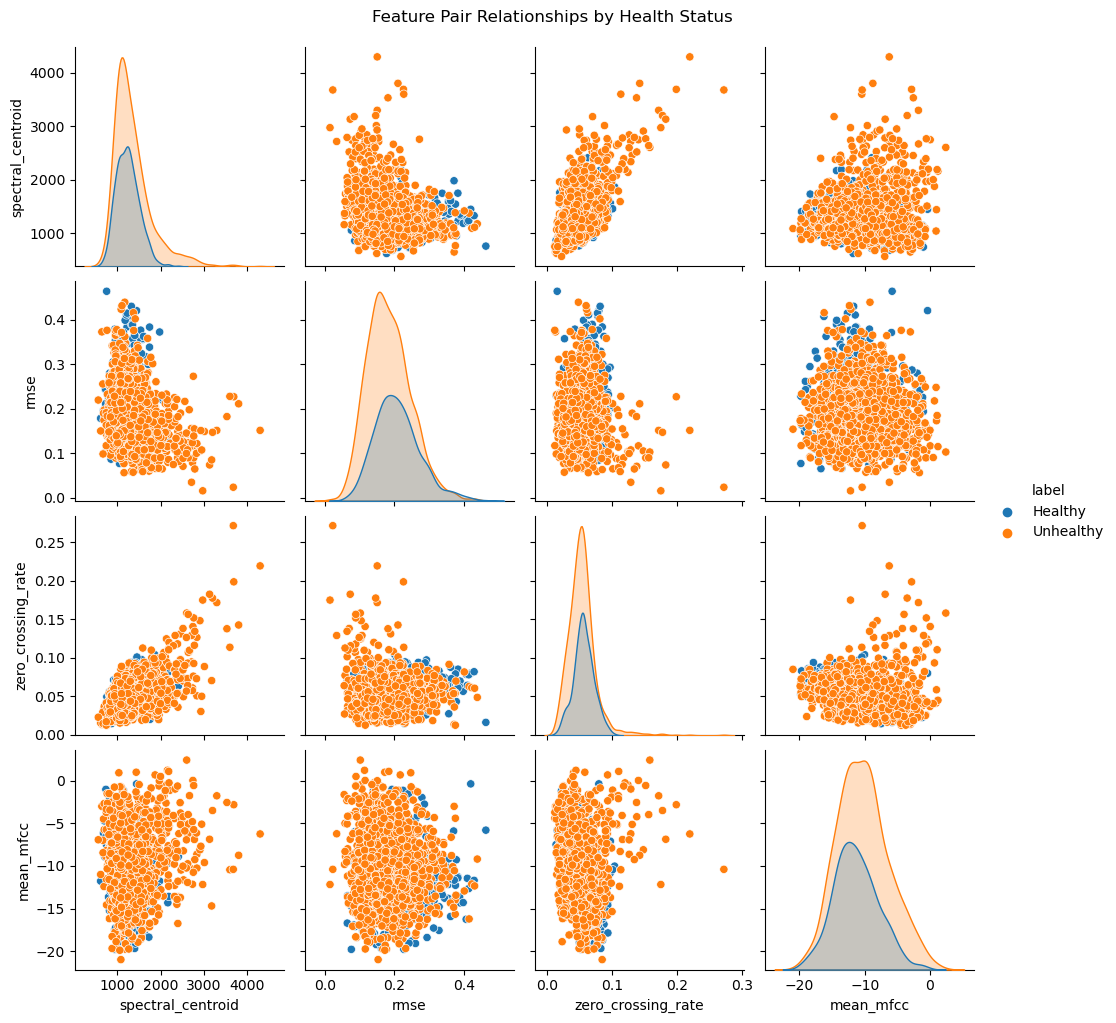

In [27]:
#Pairplot for Feature Relationships

# Pairplot
selected_features = ['spectral_centroid', 'rmse', 'zero_crossing_rate', 'mean_mfcc']
sns.pairplot(df_EDA, vars=selected_features, hue='label', diag_kind='kde')
plt.suptitle("Feature Pair Relationships by Health Status", y=1.02)
plt.show()

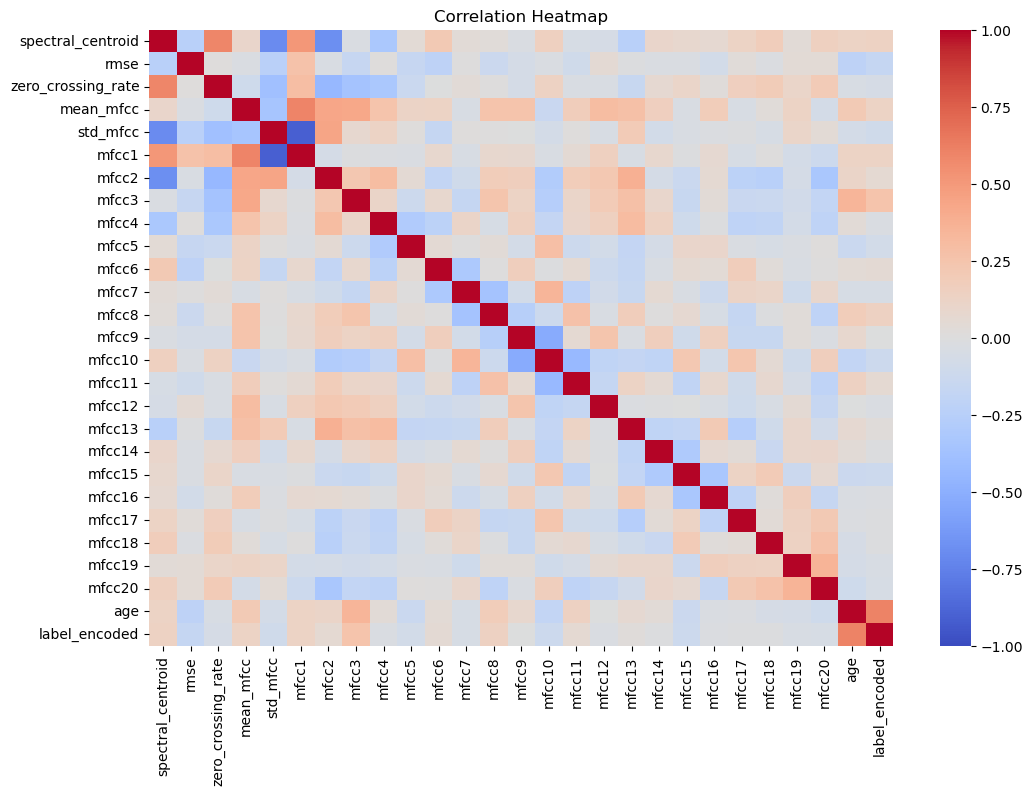

In [28]:
#Correlation Heatmap for Key Audio Features and Health Status

# Plot Heatmap
df_EDA['label_encoded'] = df_EDA['label'].map({'Healthy': 0, 'Unhealthy': 1})
numeric_cols = ['spectral_centroid', 'rmse', 'zero_crossing_rate', 'mean_mfcc', 'std_mfcc'] + [f'mfcc{i}' for i in range(1, 21)] + ['age']
plt.figure(figsize=(12, 8))
corr = df_EDA[numeric_cols + ['label_encoded']].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

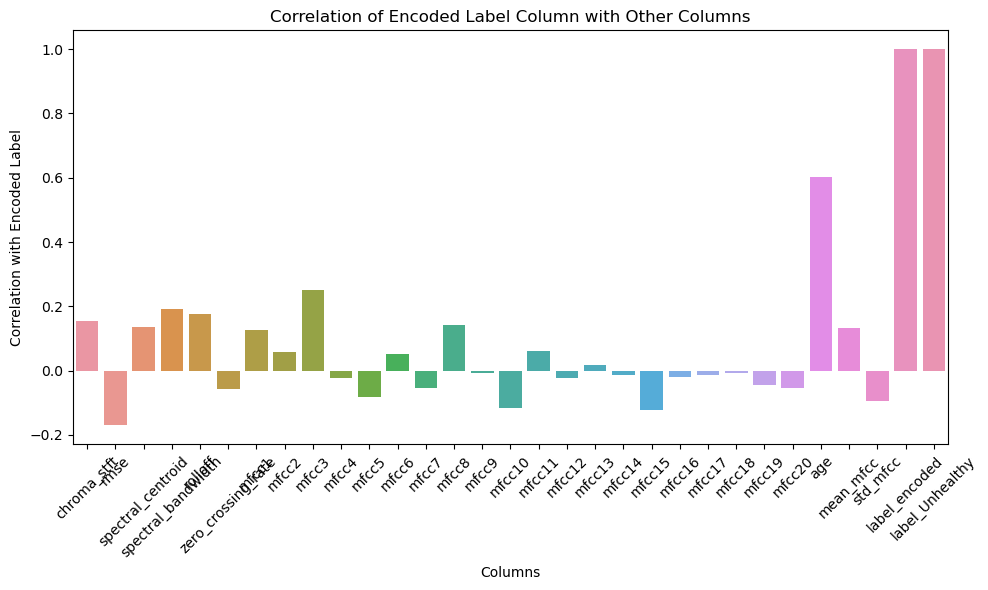

In [29]:
#Plotting the correlation to label

#Creating a copy of  df_EDA
df_new = df_EDA

# Step 1: Drop the 'filename' and 'G' columns
df_new = df_new.drop(columns=['gender'])

# Step 2: Encode the 'label' column using One-Hot Encoding
df_new = pd.get_dummies(df_new, columns=['label'], drop_first=True)

# Step 3: Calculate the correlation matrix
correlation_matrix = df_new.corr()

# Step 4: Extract the correlation of the 'label' column with all other columns
label_correlation = correlation_matrix.filter(like='label_').iloc[:, 0]

# Step 5: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=label_correlation.index, y=label_correlation.values)
plt.xticks(rotation=45)
plt.title('Correlation of Encoded Label Column with Other Columns')
plt.xlabel('Columns')
plt.ylabel('Correlation with Encoded Label')
plt.tight_layout()
plt.show()

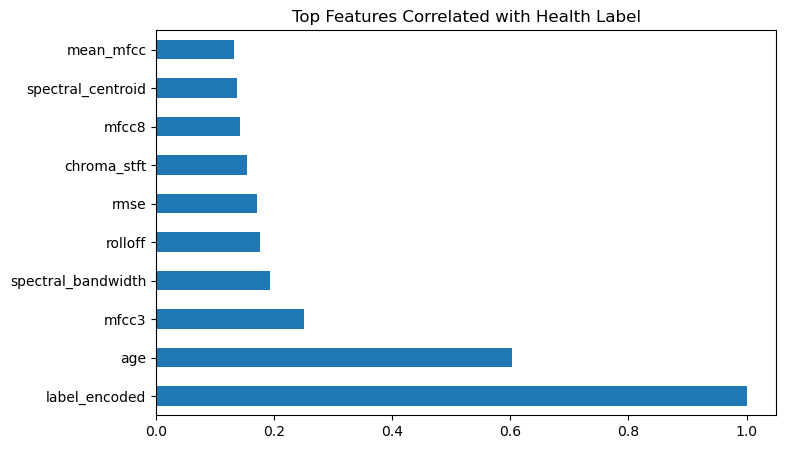

In [30]:
#Top Key Features

# Bar Chart
corr = df_EDA.corr(numeric_only=True)['label_encoded'].abs().sort_values(ascending=False)
top_corr = corr.head(10)
top_corr.plot(kind='barh', figsize=(8,5), title='Top Features Correlated with Health Label')
plt.show()

## Model Building

### Feature Preparation

In [31]:
df.columns

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label', 'patient_ID', 'gender', 'age'],
      dtype='object')

In [32]:
#Identify feature columns and target variable
target = 'label'
features = [col for col in df.columns if col not in [target, 'filename', 'patient_ID']]

X = df[features]
y = df[target]

print(f"Number of Features: {X.shape[1]}")
print(f"Target Variable: {target}\n")

Number of Features: 28
Target Variable: label



In [33]:
#from sklearn.preprocessing import LabelEncoder

#Encode Gender (G) m=0, f=1
if 'gender' in X.columns:
     X.loc[:, 'gender'] = LabelEncoder().fit_transform(X['gender'])

In [34]:
#Encode Health Status (label) Healthy=0, Unhealthy=1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [35]:
#from sklearn.preprocessing import StandardScaler

#Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
#from sklearn.model_selection import train_test_split

#Training/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

In [37]:
#Verify the split
print("\nTraining set shape:", X_train.shape)
print("\nTesting set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))


Training set shape: (1628, 28)

Testing set shape: (407, 28)

Class distribution in training set:
1    0.662162
0    0.337838
Name: proportion, dtype: float64


## Model Building and Training

In [38]:
#Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(n_estimators = 101),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=101),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [39]:
#Train each model and store predictions
predictions = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds

print("\nAll models trained successfully!\n")

Training Logistic Regression...
Training Decision Tree...
Training Gradient Boost...
Training Random Forest...
Training XGBoost...

All models trained successfully!



In [40]:
#Evalute Models

#Evaluation Function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"===== {name} =====")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("--------------------------------------------------\n")

    return pd.Series({'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1})

#Evaluate all models and store results
results = pd.DataFrame()

for name, preds in predictions.items():
    results[name] = evaluate_model(name, y_test, preds)

#Readability
results = results.T.sort_values(by="F1-Score", ascending=False)
print("Model Performance Summary:\n")
display(results)

===== Logistic Regression =====
Accuracy:  0.8231
Precision: 0.8808
Recall:    0.8481
F1 Score:  0.8642

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75       137
           1       0.88      0.85      0.86       270

    accuracy                           0.82       407
   macro avg       0.80      0.81      0.81       407
weighted avg       0.83      0.82      0.82       407

--------------------------------------------------

===== Decision Tree =====
Accuracy:  0.7690
Precision: 0.8235
Recall:    0.8296
F1 Score:  0.8266

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       137
           1       0.82      0.83      0.83       270

    accuracy                           0.77       407
   macro avg       0.74      0.74      0.74       407
weighted avg       0.77      0.77      0.77       407

------------------------------------------

,Accuracy,Precision,Recall,F1-Score
XGBoost,0.852580,0.883212,0.896296,0.889706
Random Forest,0.842752,0.862676,0.907407,0.884477
Gradient Boost,0.837838,0.875000,0.881481,0.878229
Logistic Regression,0.823096,0.880769,0.848148,0.864151
Decision Tree,0.769042,0.823529,0.829630,0.826568


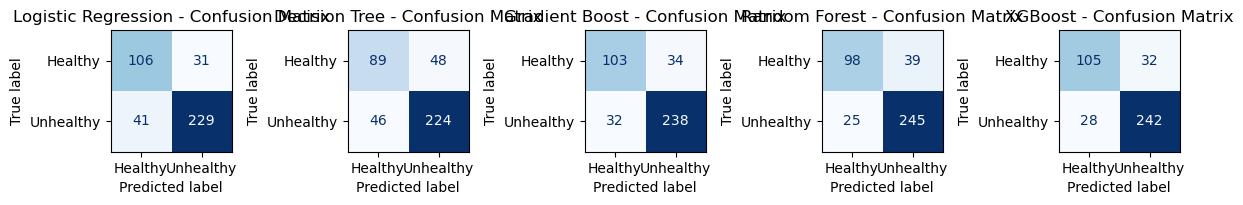

In [41]:
#Confusion Matrices for all models
fig, axes = plt.subplots(1, 5, figsize=(12, 10))
axes = axes.ravel()

for i, (name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"{name} - Confusion Matrix")

plt.tight_layout()
plt.show()

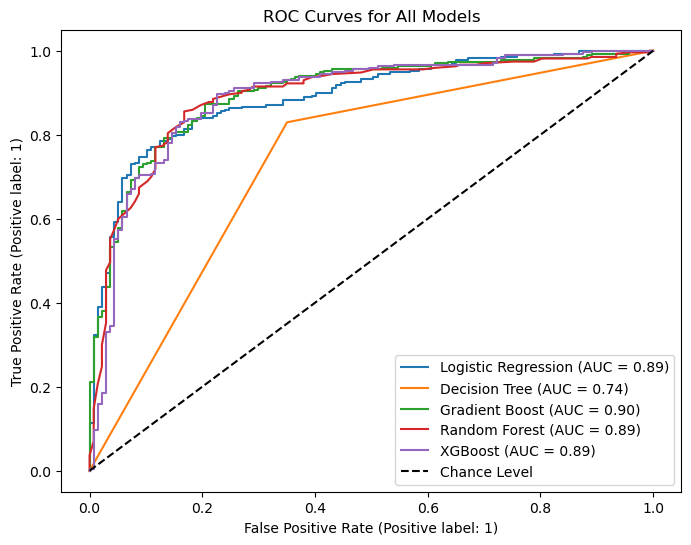

In [42]:
#ROC Curves for all models
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Some models may not have predict_proba (e.g., older logistic regression configs)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        RocCurveDisplay.from_predictions(y_test, y_proba, name=name, ax=plt.gca())
    else:
        print(f"{name} does not support probability predictions.")

plt.title("ROC Curves for All Models")
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.legend(loc='lower right')
plt.show()

In [43]:
#Calculate and display AUC Scores
auc_scores = {}
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc_scores[name] = roc_auc_score(y_test, y_proba)

auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
auc_df = auc_df.sort_values(by='AUC', ascending=False)
print("AUC Scores:\n")
display(auc_df)

AUC Scores:



,AUC
Gradient Boost,0.897999
Random Forest,0.892092
Logistic Regression,0.890835
XGBoost,0.890754
Decision Tree,0.739632


### Model Comparison

In [44]:

#Final Results
final_results = results.merge(auc_df, left_index=True, right_index=True, how='left')
final_results = final_results.sort_values(by='F1-Score', ascending=False)

print("🔹 Final Model Performance Summary:\n")
display(final_results)

🔹 Final Model Performance Summary:



,Accuracy,Precision,Recall,F1-Score,AUC
XGBoost,0.852580,0.883212,0.896296,0.889706,0.890754
Random Forest,0.842752,0.862676,0.907407,0.884477,0.892092
Gradient Boost,0.837838,0.875000,0.881481,0.878229,0.897999
Logistic Regression,0.823096,0.880769,0.848148,0.864151,0.890835
Decision Tree,0.769042,0.823529,0.829630,0.826568,0.739632


In [45]:
#Best Performing Model!
best_model_name = final_results.index[0]
print(f"\n🏆 Best Performing Model: {best_model_name}")


🏆 Best Performing Model: XGBoost


# Conclusions

## EDA

-It was observed that a higher number of patients had a spectral centroid, rmse and zero crossing rate as compared to healthy patients


-There was a higher distribution of unhealthy to healthy patients in this dataset and among the unhealthy patients, there were more women than men, however the percentage of unhealthy men were higher than the percentage of unhealthy women within their respective population.


-The health status by age showed that unhealthy patients tended to fall in the higher end of the age range while most of the healthy patients were in the lower age range (19 - 24 years old).


-Boxplots showed that unhealthy patients tended to have a lower mean rmse, zero crossing rate than healthy patients, while there was also a higher mean mfcc and age for unhealthy patients as compared to healthy patients.


-There appears to be a positive correlation between zero crossing rate and spectral centroid in unhealthy patients.


-There is a positive correlation with patient health status and patient age, mfcc3, central centroid, spectral bandwidth,rolloff, mfcc 8, rmse,chroma shift, mfcc 7 and mfcc 2, while there is a negative correlation between patient health status and mean mfcc, mfcc 15, mfcc 10, mfcc5, mfcc4, mfcc 18 and mfcc 19.


-The top 10 features correlated to patient health status are age, mfcc 3, spectral bandwidth, rolloff, rmse, chroma stft, mfcc 8, spectral centroid and mean mfcc.

## Model Performance

- The XGBoost Classifier performed the best out of all the other classifier models with the highest accuracy, precision, recal, f1 score and AUC performance.